In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Python SQL toolkit and Object Relational Mapper, sql
import sqlalchemy
import pandas as pd

from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from dotenv import load_dotenv


# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

import psycopg2
from dbconnection import connect_string  # make sure that the file is .py 

In [3]:
# Create a connection to a SQL database with information in config file

engine = create_engine (connect_string)
inspector = inspect(engine)
inspector.get_table_names()


['titles', 'employees', 'dept_emp', 'departments', 'dept_manager', 'salaries']

In [4]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['titles', 'employees', 'departments']

In [5]:
#retrieve data to sow the most common salary range
results=engine.execute('SELECT count(salary) as count, round((salary::numeric),0) as salary from salaries group by salary order by count desc limit 10').fetchall()

In [6]:
#convert information to dataframe
df = pd.DataFrame(results)
df



,count,salary
0,95346,40000
1,19,55581
2,18,53078
3,18,53738
4,17,47454
5,17,45184
6,17,44564
7,16,43995
8,16,49416
9,16,45050


In [7]:
df.dtypes
df = df.astype({'salary':'int'})

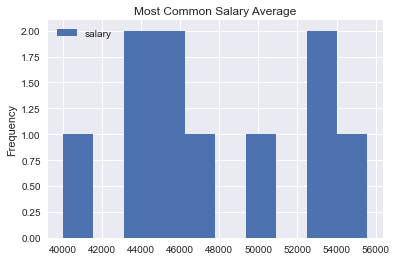

In [8]:
#create histogram
df.plot(kind="hist", x="count", y="salary")
plt.title("Most Common Salary Average")
plt.show()

In [9]:
results2=engine.execute ('select t.title AS title, round(AVG(salary::numeric),0) AS Salary from salaries s inner join employees e  on e.emp_no = s.emp_no inner join titles t on e.title_id = t.title_id group by  title order by salary desc').fetchall()
df2=pd.DataFrame(results2)

print(df2)                  

                title salary
0        Senior Staff  58550
1               Staff  58465
2             Manager  51531
3    Technique Leader  48583
4  Assistant Engineer  48564
5            Engineer  48535
6     Senior Engineer  48507


In [10]:
df2.dtypes

title     object
salary    object
dtype: object

In [11]:
df2 = df2.astype({'salary':'int'})

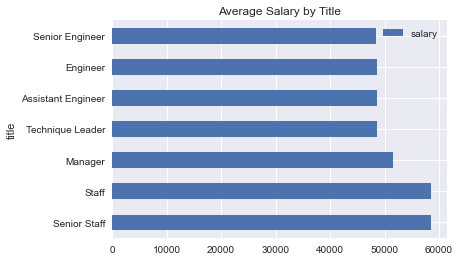

In [12]:
df2.plot(kind="barh", x="title", y="salary")
plt.title("Average Salary by Title")
plt.show()